In [1]:
import pycbc
import matplotlib.pyplot as plt
from pycbc.waveform import get_td_waveform,get_fd_waveform, fd_approximants
import numpy as np
import pylab

In [2]:
mt = 100.0
q = 7.0
l = np.pi/3

deltaF = 0.01
f_min = 20.
phase = 0.
sampling_rate = 4096.
deltaT = 1/sampling_rate

Here I am conducting a test to test which way to the final signal is suitable

1. Frequency --> Time

a. Using numpy

b. Using .to_time_series

2. Time --> Frequency --> Time

a. Using .to_frequencyseries + .to_timeseries

b. Using .to_frequencyseries + numpy

In [3]:
shifted_hp, shifted_hc = get_td_waveform(approximant="IMRPhenomXPHM",
                         mass1=mt * q / (1 + q), 
                         mass2=mt  / (1 + q), 
                         delta_t=1.0/4096, 
                         f_lower=20.0,
                         f_final = 2048,
                         coa_phase = 0,
                         inclination=l)

hpf, hcf = get_fd_waveform(approximant='IMRPhenomXPHM', mass1=mt * q / (1 + q), 
                         mass2=mt  / (1 + q), 
                         delta_t=1.0/4096, 
                         f_lower=20.0,
                         delta_f = 0.01,
                         f_final = 2048,
                         coa_phase = 0,
                         inclination=l)

### Method 1. Frequency to Time

a. Using Numpy

In [4]:
Fp = 1
Fc = 0.
hf = Fp*hpf.data + Fc*hcf.data



ht = np.fft.irfft(hf)

ht_new = np.zeros(len(ht))
cut_time=0.1
ht_new[0:len(ht)-int(cut_time/deltaT)]=ht[int(cut_time/deltaT):len(ht)]
ht_new[len(ht)-int(cut_time/deltaT):len(ht)]=ht[0:int(cut_time/deltaT)]

t = np.arange(0, len(ht)*deltaT, deltaT)
idx = np.where(ht_new==max(ht_new))[0][0]
t = t-t[idx]

b. Using .to_time_series

In [5]:
hbt = hpf.to_timeseries()

### Method 2 - Time to Frequency to Time


a. Using Using .to_frequencyseries + .to_timeseries

In [6]:
shifted_hpt = shifted_hp.to_frequencyseries()

new_shift  = shifted_hpt.to_timeseries()

b = Using .to_frequencyseries + numpy

In [7]:
hnew2 = Fp*shifted_hpt.data 



newh2 = np.fft.irfft(hnew2)

newh2_new = np.zeros(len(newh2))
cut_time=0.1
newh2_new[0:len(newh2)-int(cut_time/deltaT)]=newh2[int(cut_time/deltaT):len(newh2)]
newh2_new[len(newh2)-int(cut_time/deltaT):len(newh2)]=newh2[0:int(cut_time/deltaT)]

tnew = np.arange(0, len(newh2)*deltaT, deltaT)
idx = np.where(newh2_new==max(newh2_new))[0][0]
tnew = tnew-tnew[idx]

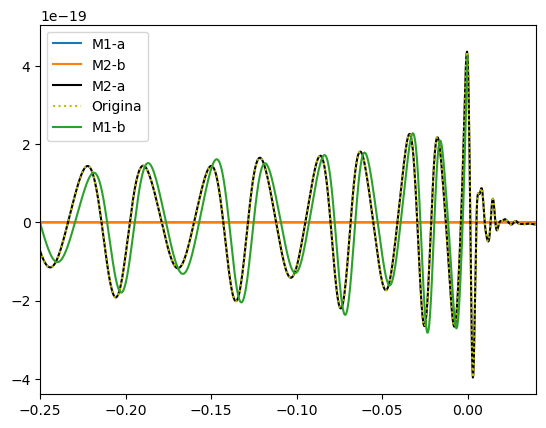

In [8]:
pylab.plot(t,ht_new,label="M1-a")
pylab.plot(tnew,newh2_new,label="M2-b")
pylab.plot(new_shift.sample_times,new_shift,'-k',label = "M2-a")
pylab.plot(shifted_hp.sample_times,shifted_hp,':y',label="Origina")
pylab.plot(hbt.sample_times,hbt,label="M1-b")
pylab.xlim(-0.25,0.04)
pylab.legend()
pylab.show()

Zooming in to get M1-a and M2-b

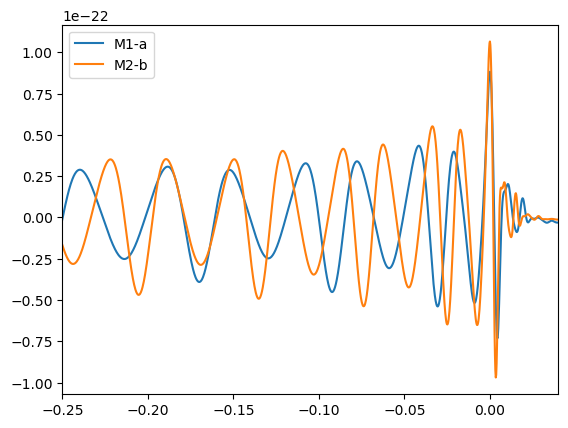

In [9]:
pylab.plot(t,ht_new,label="M1-a")
pylab.plot(tnew,newh2_new,label="M2-b")
#pylab.plot(new_shift.sample_times,new_shift,'-k',label = "M2-a")
#pylab.plot(shifted_hp.sample_times,shifted_hp,':y',label="Origina")
#pylab.plot(hbt.sample_times,hbt,label="M1-b")
pylab.xlim(-0.25,0.04)
pylab.legend()
pylab.show()

**RESULTS**

M1-a is very small compared to the original waveform obtained from `get_td_waveform`

M1-b has similar values of maxima as of originl but could not retrieve the full signal and is also shifted.

M2-a is perfect and matches exactly.

M2-b is also very small but from the shape of waveform from zoomed in graph it has a similar evolution when retrieving.